In [2]:
import csv
import math
import numpy as np
import scipy as sp
from scipy.linalg import eigh
from numpy.linalg import norm
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

In [3]:
with open('/Users/macbookpro/Desktop/IE529_Comp2/Dataset_1/clustering.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    x = list(reader)
    data_1 = np.array(x).astype("float")
    
    
with open('/Users/macbookpro/Desktop/IE529_Comp2/Dataset_2/ShapedData.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    x = list(reader)
    data_2 = np.array(x).astype("float")

# KMeans

## dataset 1

In [71]:
inertia = []
K_list = []

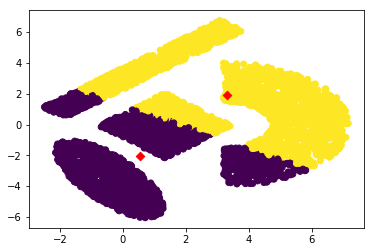

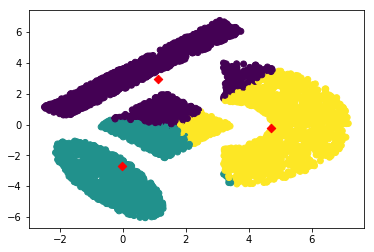

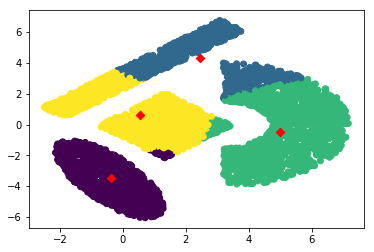

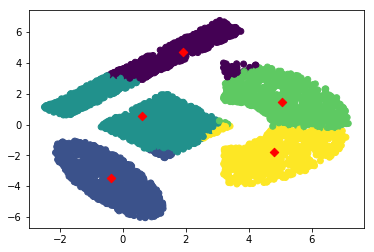

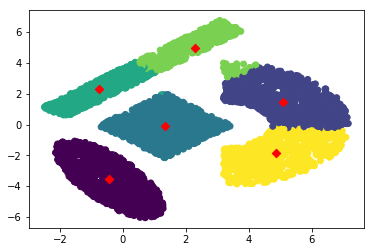

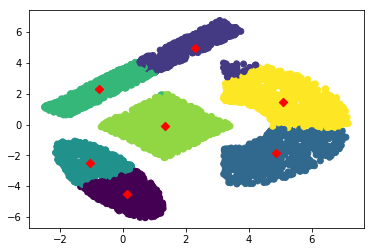

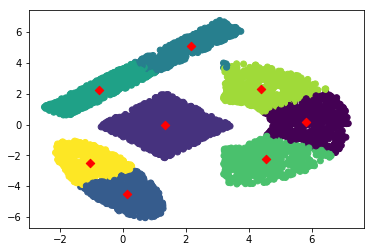

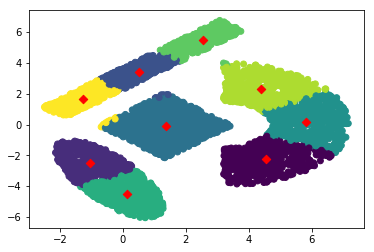

In [72]:
from sklearn.cluster import KMeans
X = data_2
# K = 6
# inertia = []
# K_list = []
# init='random'
for i in range(2,10):
    K = i
    K_list.append(K)

    kmeans = KMeans(n_clusters=K).fit(X)
    c = kmeans.labels_
    centroids = kmeans.cluster_centers_
    inertia.append(kmeans.inertia_)
    plt.scatter(X[:,0],X[:,1], c=c)
    plt.scatter(centroids[:,0], centroids[:,1], c = 'r', marker='D')
    # plt.savefig('kmeans_with_centroids.svg',format='svg')
    plt.show()

In [22]:
kmeans.cluster_centers_

array([[ 4.80833513,  1.05385739],
       [-0.2159331 , -0.0629825 ]])

In [57]:
K_list

[2, 4, 7]

In [58]:
inertia

[6020.257248595095, 3824.009228229967, 2330.6579438578096]

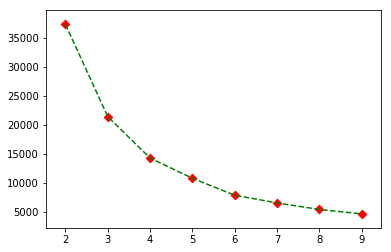

In [73]:
plt.plot(K_list, inertia, 'g--')
plt.scatter(K_list, inertia, c='r', marker = 'D')
plt.savefig('D_K.svg',format='svg')
plt.show()

# Spectral Clustering

In [105]:
from sklearn.cluster import SpectralClustering
X = data_2
K = 6
# D = []
# K_list = []

In [106]:
# from sklearn.cluster import SpectralClustering
# X = data_2
# K = 2
# init='random'

K_list.append(K)
spectralclustering = SpectralClustering(n_clusters=K).fit(X)
c = spectralclustering.labels_
D.append(compute_dist(X, c, K))


# plt.plot([2, 4, 6], D, 'r--')
# # plt.scatter(X[:,0],X[:,1], c=c)
# # plt.scatter(centroids[:,0], centroids[:,1], c = 'r', marker='D')
# # plt.savefig('kmeans_with_centroids.svg',format='svg')
# plt.show()

In [88]:
def compute_dist(X, idx, K):
    dist = []
    for i in range(K):
        sample = X[idx == i]
        center_x = np.mean(X[:,0])
        center_y = np.mean(X[:,1])
        for points in sample:
            dist.append(math.sqrt((points[0] - center_x)**2 + (points[1] - center_y)**2))
    return sum(dist)

In [107]:
D

[15472.389172722245, 15472.38917272228, 15472.389172722285]

In [108]:
K_list

[2, 4, 6]